In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!zip -r /content/drive/MyDrive/studying/CS7643/CS7643Project/AugLyEd/AugLyEdHateful_memes.zip /content/drive/MyDrive/studying/CS7643/CS7643Project/AugLyEd/hateful_memes

Streaming output truncated to the last 5000 lines.
  adding: content/drive/MyDrive/studying/CS7643/CS7643Project/AugLyEd/hateful_memes/img/69743.png (deflated 2%)
  adding: content/drive/MyDrive/studying/CS7643/CS7643Project/AugLyEd/hateful_memes/img/16873.png (deflated 0%)
  adding: content/drive/MyDrive/studying/CS7643/CS7643Project/AugLyEd/hateful_memes/img/75241.png (deflated 0%)
  adding: content/drive/MyDrive/studying/CS7643/CS7643Project/AugLyEd/hateful_memes/img/67438.png (deflated 0%)
  adding: content/drive/MyDrive/studying/CS7643/CS7643Project/AugLyEd/hateful_memes/img/93051.png (deflated 0%)
  adding: content/drive/MyDrive/studying/CS7643/CS7643Project/AugLyEd/hateful_memes/img/29675.png (deflated 0%)
  adding: content/drive/MyDrive/studying/CS7643/CS7643Project/AugLyEd/hateful_memes/img/46527.png (deflated 0%)
  adding: content/drive/MyDrive/studying/CS7643/CS7643Project/AugLyEd/hateful_memes/img/27053.png (deflated 0%)
  adding: content/drive/MyDrive/studying/CS7643/CS764

In [ ]:
# Note: restart runtime after this import before running the augmentations
!pip install -U augly
!sudo apt-get install python3-magic

!rm /content/hateful_memes -r -f
!unzip -qq /content/drive/MyDrive/studying/CS7643/CS7643Project/hateful_memes.zip

## copy AugLyEd images
# !cp -r /content/drive/MyDrive/studying/CS7643/CS7643Project/AugLyEd/hateful_memes /content/
# !cp -r /content/drive/MyDrive/studying/CS7643/CS7643Project/AugLyEd/AugLyEdHateful_memes.zip /content/
## copy and unzip trained model based on AugLyEd images
# !cp /content/drive/MyDrive/studying/CS7643/CS7643Project/AugLyEd/hateful_memes/AugLyEd_VisualBERT_classification_model.zip VisualBERT_classification_model.zip 
# !unzip 'VisualBERT_classification_model.zip' 'VisualBERT_classification_model'

Reading package lists... Done
Building dependency tree       
Reading state information... Done
python3-magic is already the newest version (2:0.4.15-1).
0 upgraded, 0 newly installed, 0 to remove and 40 not upgraded.


# AugLy start

In [ ]:
import augly.image as imaugs
from IPython.display import display
import augly.utils as utils
import os
import random
from PIL import Image

In [ ]:
# Define directory and augmentations method
directory = "/content/hateful_memes/img/"

augScreen = imaugs.OverlayOntoScreenshot(
            template_filepath=os.path.join(
                utils.SCREENSHOT_TEMPLATES_DIR, "mobile.png"
            ),
        )
augBrightness = imaugs.RandomBrightness()
augAspectRatio = imaugs.RandomAspectRatio()
augEmojiOverlay = imaugs.RandomEmojiOverlay()
augNoise = imaugs.RandomNoise()
augs = [augScreen, augBrightness, augAspectRatio, augEmojiOverlay, augNoise]

In [ ]:
def log_progress(sequence, every=None, size=None, name='Items'):
    from ipywidgets import IntProgress, HTML, VBox
    from IPython.display import display

    is_iterator = False
    if size is None:
        try:
            size = len(sequence)
        except TypeError:
            is_iterator = True
    if size is not None:
        if every is None:
            if size <= 200:
                every = 1
            else:
                every = int(size / 200)     # every 0.5%
    else:
        assert every is not None, 'sequence is iterator, set every'

    if is_iterator:
        progress = IntProgress(min=0, max=1, value=1)
        progress.bar_style = 'info'
    else:
        progress = IntProgress(min=0, max=size, value=0)
    label = HTML()
    box = VBox(children=[label, progress])
    display(box)

    index = 0
    try:
        for index, record in enumerate(sequence, 1):
            if index == 1 or index % every == 0:
                if is_iterator:
                    label.value = '{name}: {index} / ?'.format(
                        name=name,
                        index=index
                    )
                else:
                    progress.value = index
                    label.value = u'{name}: {index} / {size}'.format(
                        name=name,
                        index=index,
                        size=size
                    )
            yield record
    except:
        progress.bar_style = 'danger'
        raise
    else:
        progress.bar_style = 'success'
        progress.value = index
        label.value = "{name}: {index}".format(
            name=name,
            index=str(index or '?')
        )


In [ ]:
# input_img_path = "/content/hateful_memes/img/37809.png"
# # We can use the AugLy scale augmentation
# input_img = imaugs.scale(input_img_path, factor=0.8)
# display(input_img)

In [ ]:
for filename in log_progress(os.listdir(directory)):
  input_img_path = os.path.join(directory, filename)
  input_img = imaugs.scale(input_img_path, factor=0.8)
  aug = random.choice(augs)
  input_img = aug(input_img)
  input_img.save(input_img_path)

In [ ]:
!cp -r /content/hateful_memes/ /content/drive/MyDrive/studying/CS7643/CS7643Project/AugLyEd

In [ ]:
!rm -r /content/AugLyEd
!cp -r /content/drive/MyDrive/studying/CS7643/CS7643Project/AugLyEd/hateful_memes /content/
# !cp -r /content/hateful_memes/  /content/

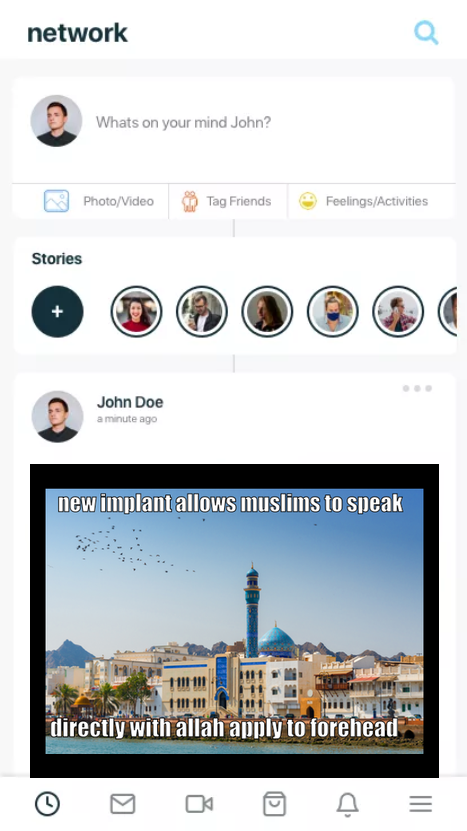

In [ ]:
# # input_img_path = os.path.join(
# #     utils.TEST_URI, "image", "inputs", "dfdc_1.jpg"
# # )
# input_img_path = "/content/hateful_memes/img/01358.png"
# # We can use the AugLy scale augmentation
# input_img = imaugs.scale(input_img_path, factor=0.8)
# augPerspectiveTransform = imaugs.PerspectiveTransform(sigma=10.0)
# aug = imaugs.OverlayOntoScreenshot(
#             template_filepath=os.path.join(
#                 utils.SCREENSHOT_TEMPLATES_DIR, "mobile.png"
#             ))
# # aug = imaugs.RandomNoise()
# # RandomBrightness()
# # RandomAspectRatio()
# # imaugs.RandomEmojiOverlay()
# # imaugs.RandomNoise()
# aug(input_img)

## After Aguly

# Resume training

In [ ]:
! pip install transformers
! pip install datasets 
! pip install --upgrade tqdm

!pip uninstall -y torch
!pip install torch==1.7.1

In [ ]:
!pip install pytorch-lightning==1.3.8

In [ ]:
import torch
torch.__version__

'1.9.0+cu102'

In [ ]:
from torch.utils.data import Dataset, DataLoader
import pandas as pd
import numpy as np
import os

In [ ]:
import os
import shutil

dirpath = '/content/model-checkpoints'
if os.path.exists(dirpath) and os.path.isdir(dirpath):
    shutil.rmtree(dirpath)

In [ ]:
df_train = pd.read_json('hateful_memes/train.jsonl', lines=True)
df_train.head()

,id,img,label,text
0,42953,img/42953.png,0,its their character not their color that matters
1,23058,img/23058.png,0,don't be afraid to love again everyone is not ...
2,13894,img/13894.png,0,putting bows on your pet
3,37408,img/37408.png,0,i love everything and everybody! except for sq...
4,82403,img/82403.png,0,"everybody loves chocolate chip cookies, even h..."


In [ ]:
df_train.label.value_counts()

0    5481
1    3019
Name: label, dtype: int64

In [ ]:
val_seen = pd.read_json('hateful_memes/dev_seen.jsonl', lines=True)
val_unseen = pd.read_json('hateful_memes/dev_unseen.jsonl', lines=True)
df_val = pd.concat([val_seen, val_unseen],axis=0)
df_val.head()

,id,img,label,text
0,8291,img/08291.png,1,white people is this a shooting range
1,46971,img/46971.png,1,bravery at its finest
2,3745,img/03745.png,1,your order comes to $37.50 and your white priv...
3,83745,img/83745.png,1,it is time.. to send these parasites back to t...
4,80243,img/80243.png,1,mississippi wind chime


In [ ]:
test_seen = pd.read_json('hateful_memes/test_seen.jsonl', lines=True)
test_unseen = pd.read_json('hateful_memes/test_unseen.jsonl', lines=True)
df_test = pd.concat([test_seen, test_unseen],axis=0)
df_train.shape, df_val.shape, df_test.shape

((8500, 4), (1040, 4), (3000, 4))

In [ ]:
df_val.label.value_counts()

0    593
1    447
Name: label, dtype: int64

In [ ]:
df_test.label.value_counts()

0    1760
1    1240
Name: label, dtype: int64

In [ ]:
df_train.head()

,id,img,label,text
0,42953,img/42953.png,0,its their character not their color that matters
1,23058,img/23058.png,0,don't be afraid to love again everyone is not ...
2,13894,img/13894.png,0,putting bows on your pet
3,37408,img/37408.png,0,i love everything and everybody! except for sq...
4,82403,img/82403.png,0,"everybody loves chocolate chip cookies, even h..."


In [ ]:

df_train['text_len'] = df_train['text'].str.split().str.len()
df_train['text_len'].describe()

count    8500.000000
mean       11.742588
std         6.877021
min         1.000000
25%         7.000000
50%        10.000000
75%        15.000000
max        70.000000
Name: text_len, dtype: float64

In [ ]:
df_train['idx'] = df_train['id'].astype(str).str.zfill(5)
df_train.head()

,id,img,label,text,text_len,idx
0,42953,img/42953.png,0,its their character not their color that matters,8,42953
1,23058,img/23058.png,0,don't be afraid to love again everyone is not ...,12,23058
2,13894,img/13894.png,0,putting bows on your pet,5,13894
3,37408,img/37408.png,0,i love everything and everybody! except for sq...,11,37408
4,82403,img/82403.png,0,"everybody loves chocolate chip cookies, even h...",7,82403


In [ ]:
df_val['idx'] = df_val['id'].astype(str).str.zfill(5)
df_test['idx'] = df_test['id'].astype(str).str.zfill(5)

In [ ]:
df_train.shape, df_val.shape

((8500, 6), (1040, 5))

## Remove records for which features couldn't be pulled correctly

In [ ]:
import pickle
subset = False
if subset:
    with open('/content/drive/MyDrive/studying/CS7643/CS7643Project/Hateful_Memes/features_100.pickle', 'rb') as handle:
        features_dict = pickle.load(handle)
else:
    with open('/content/drive/MyDrive/studying/CS7643/CS7643Project/Hateful_Memes/features.pickle', 'rb') as handle:
        features_dict = pickle.load(handle)

In [ ]:
features_idx = list(features_dict.keys())
train_idx = df_train['idx'].tolist()
val_idx = df_val['idx'].tolist()
print(len(features_idx), len(train_idx), len(val_idx))

11456 8500 1040


In [ ]:
missing_train=[]
for each in train_idx:
    if each not in features_idx:
        missing_train.append(each)


missing_val=[]
for each in val_idx:
    if each not in features_idx:
        missing_val.append(each)
print(len(missing_train), len(missing_val))

473 60


In [ ]:
df_train = df_train[~df_train['idx'].isin(missing_train)]

In [ ]:
df_val = df_val[~df_val['idx'].isin(missing_val)]

In [ ]:
df_train.shape, df_val.shape

((8027, 6), (980, 5))

## Compute Class Weight

In [ ]:
from sklearn.utils import class_weight
y_train = df_train["label"].values.tolist()
class_weights = class_weight.compute_class_weight('balanced',
                                                 np.unique(y_train),
                                                 y_train)
print(class_weights)

[0.77510622 1.40873991]


In [ ]:
df_train.label.value_counts()

0    5178
1    2849
Name: label, dtype: int64

## Load as a dataset

In [ ]:
subset = False
if subset:
    all_records = sorted(os.listdir('hateful_memes/img'))
    selection = all_records[:100]
    select_idx = [int(select.split('.')[0]) for select in selection]
    df_train = df_train[df_train['id'].isin(select_idx)]
    df_val = df_val[df_val['id'].isin(select_idx)]

df_train.shape, df_val.shape

((8027, 6), (980, 5))

In [ ]:
from datasets import list_metrics, load_metric
metrics_list = list_metrics()
print(metrics_list)

['accuracy', 'bertscore', 'bleu', 'bleurt', 'cer', 'comet', 'coval', 'cuad', 'f1', 'gleu', 'glue', 'indic_glue', 'matthews_correlation', 'meteor', 'pearsonr', 'precision', 'recall', 'rouge', 'sacrebleu', 'sari', 'seqeval', 'spearmanr', 'squad', 'squad_v2', 'super_glue', 'wer', 'wiki_split', 'xnli']


In [ ]:
acc_metric = load_metric('accuracy')
f1_metric = load_metric('f1')
precision_metric = load_metric('precision')
recall_metric = load_metric('recall')

Downloading:   0%|          | 0.00/1.42k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.96k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.98k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.99k [00:00<?, ?B/s]

## Create Dataset function

In [ ]:
from transformers import BertTokenizer, VisualBertForPreTraining, AutoTokenizer
tokenizer = AutoTokenizer.from_pretrained('bert-base-uncased')

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

## Load Visual Embedding features

In [ ]:
import torch

In [ ]:
class HatefulMemesData(Dataset):
    def __init__(self, df, tokenizer, sequence_length, 
                 print_text=False):         

        self.sequence_length = sequence_length
        self.tokenizer = tokenizer
        self.print_text = print_text

        texts = df["text"].values.tolist()
        labels = df["label"].values.tolist()
        ids =  df["idx"].values.tolist()

        self.dataset = []
        for i, inp in enumerate(texts):
            self.dataset.append({"text": inp, "label": labels[i], 'idx': ids[i]})
  
    def __len__(self):
        return len(self.dataset)


    def tokenize_data(self, example):
   
        idx = example['idx']
        idx = [idx] if isinstance(idx, str) else idx
        # encoded_dict = tokenizer.batch_encode_plus(example['text'], padding='max_length', max_length=max_len, truncation=True, return_tensors='pt')
        encoded_dict = tokenizer(example['text'], padding='max_length', max_length=self.sequence_length, truncation=True, return_tensors='pt')
        tokens = encoded_dict['input_ids']
        token_type_ids = encoded_dict['token_type_ids']
        attn_mask = encoded_dict['attention_mask']
        
        targets = torch.tensor(example['label']).type(torch.int64)
        embed_list = [features_dict[idval] for idval in idx]
        embed_list = np.array(embed_list)
        visual_embeds = torch.from_numpy(embed_list).double()
        # visual_embeds = visual_embeds.repeat(1,1,2)

        visual_attention_mask = torch.ones(visual_embeds.shape[:-1], dtype=torch.int64)
        visual_token_type_ids = torch.ones(visual_embeds.shape[:-1], dtype=torch.int64)

        inputs={"input_ids": tokens.squeeze(),
            "attention_mask": attn_mask.squeeze(),
            "token_type_ids": token_type_ids.squeeze(),
            "visual_embeds": visual_embeds.squeeze(),
            "visual_token_type_ids": visual_token_type_ids.squeeze(),
            "visual_attention_mask": visual_attention_mask.squeeze(),
            "label": targets.squeeze()
        }
        
        return inputs
  
    def __getitem__(self, index):
        inputs = self.tokenize_data(self.dataset[index])
        
        if self.print_text:
            for k in inputs.keys():
                print(k, inputs[k].shape, inputs[k].dtype)

        return inputs

In [ ]:
dataset = HatefulMemesData(df_val, tokenizer, 50, True)

In [ ]:
example1 = dataset[5]

input_ids torch.Size([50]) torch.int64
attention_mask torch.Size([50]) torch.int64
token_type_ids torch.Size([50]) torch.int64
visual_embeds torch.Size([50, 1024]) torch.float64
visual_token_type_ids torch.Size([50]) torch.int64
visual_attention_mask torch.Size([50]) torch.int64
label torch.Size([]) torch.int64


## Fine-Tune Model

In [ ]:
from transformers import BertTokenizer, VisualBertModel, TrainingArguments, Trainer

model = VisualBertModel.from_pretrained('uclanlp/visualbert-nlvr2-coco-pre')


Downloading:   0%|          | 0.00/631 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/445M [00:00<?, ?B/s]

Some weights of the model checkpoint at uclanlp/visualbert-nlvr2-coco-pre were not used when initializing VisualBertModel: ['cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight']
- This IS expected if you are initializing VisualBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing VisualBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
# example1 = tokenize_data(df_train.to_dict('records')[0])
print(example1)

{'input_ids': tensor([ 101, 4209, 2317, 2111, 1010, 2008, 1005, 1055, 2763, 1996, 3336, 2269,
         102,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0]), 'attention_mask': tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0]), 'token_type_ids': tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0]), 'visual_embeds': tensor([[ 0.6524, -0.5618,  1.2990,  ..., -0.4103,  0.6098,  1.4113],
        [ 0.2675, -0.4267,  0.9692,  ..., -0.2713,  0.1254,  1.2369],
        [ 0.7163, -0.4777, -1.3813,  ..., -3.3351,  1.6249, -0.8078],
        ...,
        [-3.9141

In [ ]:
example1['input_ids'].unsqueeze(0).shape

torch.Size([1, 50])

In [ ]:
model = model.double()

In [ ]:
outputs = model(input_ids=example1['input_ids'].unsqueeze(0),
                attention_mask=example1['attention_mask'].unsqueeze(0),
                visual_token_type_ids=example1['visual_token_type_ids'].unsqueeze(0),
                token_type_ids=example1['token_type_ids'].unsqueeze(0),
                visual_embeds=example1['visual_embeds'].unsqueeze(0),
                visual_attention_mask=example1['visual_attention_mask'].unsqueeze(0),
                )

In [ ]:
pooled_outputs = outputs[1]
print(pooled_outputs.shape)

torch.Size([1, 768])


## Tuning using Pytorch Lightning

In [ ]:
import pytorch_lightning as pl
from torch.utils.data import Dataset, DataLoader
from pytorch_lightning.loggers import WandbLogger
from datasets import load_metric
import torch.nn.functional as F
from sklearn.metrics import accuracy_score
from transformers import (
    AdamW,
    VisualBertModel,
    get_linear_schedule_with_warmup
)
import logging
import argparse
import time
from torch.nn import CrossEntropyLoss
from sklearn.metrics import roc_auc_score

In [ ]:
# from pytorch_lightning.loggers.wandb import WandbLogger
import os
from pathlib import Path
from string import punctuation
import torch.nn as nn

## Look at Model Summary

In [ ]:
weights = [0.77510622, 1.40873991]
wt_tensor = torch.FloatTensor(weights).cuda()
print(wt_tensor)

tensor([0.7751, 1.4087], device='cuda:0')


In [ ]:
class VisualBERTClassifier(torch.nn.Module):
    def __init__(self):
        """
        In the constructor we instantiate two nn.Linear modules and assign them as
        member variables.
        """
        super(VisualBERTClassifier, self).__init__()
        self.visualbert = VisualBertModel.from_pretrained('uclanlp/visualbert-nlvr2-coco-pre')
        self.num_labels = 2
        self.dropout = nn.Dropout(0.1)
        self.cls=  nn.Linear(768, self.num_labels)
        self.weight = torch.FloatTensor([0.77510622, 1.40873991]),

        nSamples = [5178, 2849]
        normedWeights = [1 - (x / sum(nSamples)) for x in nSamples]
        self.loss_fct = CrossEntropyLoss(weight=torch.FloatTensor(normedWeights))
        
    
    def forward(self, input_ids, attention_mask, token_type_ids, visual_embeds, visual_attention_mask,
                visual_token_type_ids, labels):
        """
        In the forward function we accept a Tensor of input data and we must return
        a Tensor of output data. We can use Modules defined in the constructor as
        well as arbitrary operators on Tensors.
        """
        outputs = self.visualbert(
                input_ids,
                attention_mask=attention_mask,
                token_type_ids=token_type_ids,
                visual_embeds=visual_embeds,
                visual_attention_mask=visual_attention_mask,
                visual_token_type_ids=visual_token_type_ids,
            )
        
        pooled_output = outputs[1]
        pooled_output = self.dropout(pooled_output)
        logits = self.cls(pooled_output)
        reshaped_logits = logits.view(-1, self.num_labels)

        loss = self.loss_fct(reshaped_logits, labels.view(-1))
      
        return loss, reshaped_logits

In [ ]:
model = VisualBERTClassifier().to('cuda')

Some weights of the model checkpoint at uclanlp/visualbert-nlvr2-coco-pre were not used when initializing VisualBertModel: ['cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight']
- This IS expected if you are initializing VisualBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing VisualBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
!nvidia-smi

Sun Jul 25 00:39:09 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.42.01    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   38C    P0    34W / 250W |   1381MiB / 16280MiB |      3%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

## Using HuggingFace Trainer

In [ ]:
from transformers import TrainingArguments, Trainer
batch_size = 48
seq_len = 50

In [ ]:
model = VisualBERTClassifier()
model = model.cuda()

Some weights of the model checkpoint at uclanlp/visualbert-nlvr2-coco-pre were not used when initializing VisualBertModel: ['cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight']
- This IS expected if you are initializing VisualBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing VisualBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
metric_name = "accuracy"

args = TrainingArguments(
    output_dir = "model-checkpoint",
    seed = 110, 
    evaluation_strategy = "steps",
    learning_rate=2e-5,
    per_device_train_batch_size=batch_size,
    per_device_eval_batch_size=batch_size,
    num_train_epochs=40,
    weight_decay=0.01,
    load_best_model_at_end=True,
    metric_for_best_model=metric_name,
    eval_steps = 500,
    save_steps = 500,
    fp16 = False,
    gradient_accumulation_steps = 2


)

In [ ]:
def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)
    acc = acc_metric.compute(predictions=predictions, references=labels)
    auc_score = roc_auc_score(labels, predictions)
    return {"accuracy": acc['accuracy'], "auroc": auc_score} 

In [ ]:
trainer = Trainer(
    model,
    args,
    train_dataset = HatefulMemesData(df_train,tokenizer=tokenizer, sequence_length=seq_len),
    eval_dataset =  HatefulMemesData(df_val,tokenizer=tokenizer, sequence_length=seq_len),
    tokenizer=tokenizer,
    compute_metrics=compute_metrics
)

In [ ]:
## To resume from an old checkpoint, set path in resume-from
resume_from ='/content/model-checkpoint/checkpoint-12000'
trainer.train()

***** Running training *****
  Num examples = 8027
  Num Epochs = 40
  Instantaneous batch size per device = 48
  Total train batch size (w. parallel, distributed & accumulation) = 96
  Gradient Accumulation steps = 2
  Total optimization steps = 3360


Step,Training Loss,Validation Loss,Accuracy,Auroc
500,0.437600,1.107693,0.608163,0.576781
1000,0.133500,1.835963,0.619388,0.580756
1500,0.051800,2.530182,0.621429,0.578733
2000,0.025600,2.881887,0.624490,0.584642
2500,0.011800,3.377986,0.637755,0.595097
3000,0.005000,3.451610,0.635714,0.598879


***** Running Evaluation *****
  Num examples = 980
  Batch size = 48
Saving model checkpoint to model-checkpoint/checkpoint-500
Trainer.model is not a `PreTrainedModel`, only saving its state dict.
tokenizer config file saved in model-checkpoint/checkpoint-500/tokenizer_config.json
Special tokens file saved in model-checkpoint/checkpoint-500/special_tokens_map.json
***** Running Evaluation *****
  Num examples = 980
  Batch size = 48
Saving model checkpoint to model-checkpoint/checkpoint-1000
Trainer.model is not a `PreTrainedModel`, only saving its state dict.
tokenizer config file saved in model-checkpoint/checkpoint-1000/tokenizer_config.json
Special tokens file saved in model-checkpoint/checkpoint-1000/special_tokens_map.json
***** Running Evaluation *****
  Num examples = 980
  Batch size = 48
Saving model checkpoint to model-checkpoint/checkpoint-1500
Trainer.model is not a `PreTrainedModel`, only saving its state dict.
tokenizer config file saved in model-checkpoint/checkpoint-

TrainOutput(global_step=3360, training_loss=0.09939676044242722, metrics={'train_runtime': 3722.9763, 'train_samples_per_second': 86.243, 'train_steps_per_second': 0.903, 'total_flos': 0.0, 'train_loss': 0.09939676044242722, 'epoch': 40.0})

In [ ]:
import numpy as np
trainer.evaluate()

***** Running Evaluation *****
  Num examples = 980
  Batch size = 48


{'epoch': 40.0,
 'eval_accuracy': 0.6377551020408163,
 'eval_auroc': 0.5950968602739026,
 'eval_loss': 3.377986431121826,
 'eval_runtime': 7.1901,
 'eval_samples_per_second': 136.298,
 'eval_steps_per_second': 2.921}

In [ ]:
trainer.save_model('VisualBERT_classification_model')

Saving model checkpoint to VisualBERT_classification_model
Trainer.model is not a `PreTrainedModel`, only saving its state dict.
tokenizer config file saved in VisualBERT_classification_model/tokenizer_config.json
Special tokens file saved in VisualBERT_classification_model/special_tokens_map.json


In [ ]:
!zip -r 'VisualBERT_classification_model.zip' 'VisualBERT_classification_model'

  adding: VisualBERT_classification_model/ (stored 0%)
  adding: VisualBERT_classification_model/special_tokens_map.json (deflated 40%)
  adding: VisualBERT_classification_model/tokenizer.json (deflated 59%)
  adding: VisualBERT_classification_model/pytorch_model.bin (deflated 8%)
  adding: VisualBERT_classification_model/tokenizer_config.json (deflated 39%)
  adding: VisualBERT_classification_model/training_args.bin (deflated 47%)
  adding: VisualBERT_classification_model/vocab.txt (deflated 53%)


In [ ]:
!cp VisualBERT_classification_model.zip /content/drive/MyDrive/studying/CS7643/CS7643Project/Hateful_Memes

## Pytorch Lightning version of code - May have bugs

In [ ]:
class VisualBERTFineTuner(pl.LightningModule):
    def __init__(self, hparams):
        super(VisualBERTFineTuner, self).__init__()      
        self.model = VisualBERTClassifier().double()
        self.num_labels = 2
        self.dropout = nn.Dropout(0.1)
        self.classifier = nn.Linear(768, self.num_labels)

        self.problem_type = 'single_label_classification'
        self.save_hyperparameters(hparams)
        self.tokenizer = AutoTokenizer.from_pretrained('bert-base-uncased')
        self.output_dir = Path(self.hparams.output_dir)
        self.total_steps = 0

    def is_logger(self):
        return self.trainer.global_rank <= 0
    
        
    def forward(self, input_ids, attention_mask, token_type_ids, visual_embeds, visual_attention_mask,
                visual_token_type_ids, labels):
        loss, preds = self.model(
                input_ids,
                attention_mask=attention_mask,
                token_type_ids=token_type_ids,
                visual_embeds=visual_embeds,
                visual_attention_mask=visual_attention_mask,
                visual_token_type_ids=visual_token_type_ids,
                labels = labels
            )
        return loss, preds 

    # def loss(self, batch, prediction):
    #     loss_fct = CrossEntropyLoss()
    #     labels = batch['label']
    #     loss = loss_fct(prediction.view(-1, self.num_labels), labels.view(-1))
    #     return loss
   

    def _step(self, batch):
        outputs = self(
            input_ids=batch["input_ids"],
            attention_mask=batch["attention_mask"],
            token_type_ids=batch["token_type_ids"],
            visual_embeds=batch["visual_embeds"],
            visual_attention_mask=batch["visual_attention_mask"],
            visual_token_type_ids=batch["visual_token_type_ids"],
            labels = batch['label']
        )

        return outputs
    

    def training_step(self, batch, batch_idx):
        loss, preds = self._step(batch)
        return loss
  

    def validation_step(self, batch, batch_idx):
        val_loss, preds = self._step(batch)
        preds = torch.argmax(preds, axis=1)
        labels = batch["label"]
        return {'loss': val_loss, "preds": preds, "labels": labels}

    
    def validation_epoch_end(self, outputs):
        preds = torch.cat([x['preds'] for x in outputs]).detach().cpu().numpy()
        labels = torch.cat([x['labels'] for x in outputs]).detach().cpu().numpy()
        loss = torch.stack([x['loss'] for x in outputs]).mean()
        auc_score = roc_auc_score(labels, preds, average='weighted')
        self.log('val_loss', loss, prog_bar=True)
        self.log('val_auroc', auc_score, prog_bar=True)
        self.log_dict(acc_metric.compute(predictions=preds, references=labels), prog_bar=True)


    def configure_optimizers(self):

        model = self.model
        no_decay = ["bias", "LayerNorm.weight"]
        optimizer_grouped_parameters = [
            {
                "params": [p for n, p in model.named_parameters() if not any(nd in n for nd in no_decay)],
                "weight_decay": self.hparams.weight_decay,
            },
            {
                "params": [p for n, p in model.named_parameters() if any(nd in n for nd in no_decay)],
                "weight_decay": 0.0,
            },
        ]
        optimizer = AdamW(optimizer_grouped_parameters, lr=self.hparams.learning_rate, eps=self.hparams.adam_epsilon)

        scheduler = get_linear_schedule_with_warmup(
            optimizer, num_warmup_steps=self.hparams.warmup_steps, num_training_steps=self.total_steps
        )
        scheduler = {'scheduler': scheduler, 'interval': 'step', 'frequency': 1}
        return [optimizer], [scheduler]
  
    # def optimizer_step(self, epoch, batch_idx, optimizer, optimizer_idx,
    #                    closure, on_tpu=False, using_native_amp=False, using_lbfgs=False):
    #     model = self.model
    #     if self.trainer.use_tpu:
    #         xm.optimizer_step(optimizer)
    #     else:
    #         optimizer.step(closure=closure)
    #     optimizer.zero_grad()
    #     torch.nn.utils.clip_grad_norm_(model.parameters(), self.hparams.max_grad_norm)
    #     self.lr_scheduler.step()
  
    def get_tqdm_dict(self):
        tqdm_dict = {"loss": "{:.3f}".format(self.trainer.avg_loss), "lr": self.lr_scheduler.get_last_lr()[-1]}

        return tqdm_dict
    
    def train_dataloader(self):   
        train_loader = DataLoader(HatefulMemesData(df_train, self.tokenizer, self.hparams.max_input_length),
                                batch_size=self.hparams.train_batch_size, drop_last=True, shuffle=True, num_workers=2)
       # Calculate total steps
        tb_size = self.hparams.train_batch_size * max(1, self.trainer.gpus)
        ab_size = self.trainer.accumulate_grad_batches * float(self.trainer.max_epochs)
        self.total_steps = (len(train_loader.dataset) // tb_size) // ab_size

        return train_loader

    def val_dataloader(self):
        return DataLoader(HatefulMemesData(df_val, self.tokenizer, self.hparams.max_input_length),
                          batch_size=self.hparams.eval_batch_size, num_workers=2)
    
    def test_dataloader(self):
        return  DataLoader(HatefulMemesData(df_test, self.tokenizer, self.hparams.max_input_length),
                          batch_size=self.hparams.eval_batch_size, num_workers=2)
    
    def on_save_checkpoint(self, checkpoint):
        save_path = self.output_dir.joinpath(model_prefix)
        self.model.config.save_step = self.step_count
        self.model.save_pretrained(save_path)
        self.tokenizer.save_pretrained(save_path)

In [ ]:
# from pytorch_lightning import loggers as pl_loggers
# tb_logger = pl_loggers.TensorBoardLogger('logs/')

logger = logging.getLogger(__name__)
class LoggingCallback(pl.Callback):
  def on_validation_end(self, trainer, pl_module):
    logger.info("***** Validation results *****")
    if pl_module.is_logger():
      metrics = trainer.callback_metrics
      # Log results
      for key in sorted(metrics):
        if key not in ["log", "progress_bar"]:
          logger.info("{} = {}\n".format(key, str(metrics[key])))

  def on_test_end(self, trainer, pl_module):
    logger.info("***** Test results *****")

    if pl_module.is_logger():
      metrics = trainer.callback_metrics

      # Log and save results to file
      output_test_results_file = os.path.join(pl_module.hparams.output_dir, "test_results.txt")
      with open(output_test_results_file, "w") as writer:
        for key in sorted(metrics):
          if key not in ["log", "progress_bar"]:
            logger.info("{} = {}\n".format(key, str(metrics[key])))
            writer.write("{} = {}\n".format(key, str(metrics[key])))

In [ ]:
model_name = "visualbert"
token_len = 50
model_prefix = f"{model_name}-{token_len}"

In [ ]:
args_dict = dict(
    output_dir="", # path to save the checkpoints
    max_input_length=token_len,
    learning_rate=1e-4,
    weight_decay=0.0,
    adam_epsilon=1e-8,
    warmup_steps=0,
    train_batch_size=4,
    eval_batch_size=4,
    num_train_epochs=5,
    gradient_accumulation_steps=1,
    n_gpu=1,
    resume_from_checkpoint=None, 
    val_check_interval = 0.5, 
    early_stop_callback=False,
    fp_16=False, # if you want to enable 16-bit training then install apex and set this to true
    opt_level='O1', # you can find out more on optimisation levels here https://nvidia.github.io/apex/amp.html#opt-levels-and-properties
    max_grad_norm=1.0, # if you enable 16-bit training then set this to a sensible value, 0.5 is a good default
    seed=42,
)


args_dict.update({'output_dir': "./" + model_prefix + "_final", 'num_train_epochs':6,
             'train_batch_size': 32, 'eval_batch_size': 32})
args = argparse.Namespace(**args_dict)


## Define Checkpoint function
checkpoint_callback = pl.callbacks.ModelCheckpoint(
    dirpath="./" + model_prefix + "_checkpoint", filename=model_prefix, monitor="accuracy", mode="max", save_top_k=1
)

In [ ]:
print(args)

Namespace(adam_epsilon=1e-08, early_stop_callback=False, eval_batch_size=32, fp_16=False, gradient_accumulation_steps=1, learning_rate=0.0001, max_grad_norm=1.0, max_input_length=50, n_gpu=1, num_train_epochs=6, opt_level='O1', output_dir='./visualbert-50_final', resume_from_checkpoint=None, seed=42, train_batch_size=32, val_check_interval=0.5, warmup_steps=0, weight_decay=0.0)


In [ ]:
train_params = dict(
    accumulate_grad_batches=args.gradient_accumulation_steps,
    gpus=min(1, torch.cuda.device_count()),
    max_epochs=args.num_train_epochs,
    precision= 16 if args.fp_16 else 32,
    amp_level=args.opt_level,
    resume_from_checkpoint=args.resume_from_checkpoint,
    # gradient_clip_val=args.max_grad_norm,
    checkpoint_callback=checkpoint_callback,
    val_check_interval=args.val_check_interval,
    callbacks=[LoggingCallback()],
    # logger=tb_logger
)



model = VisualBERTFineTuner(args)
trainer = pl.Trainer(**train_params)

trainer.fit(model)

## Hyperparameter Optimization

In [ ]:
! pip install optuna -q
! pip install 'ray[tune]'

     |████████████████████████████████| 301 kB 8.4 MB/s 
     |████████████████████████████████| 164 kB 80.0 MB/s 
     |████████████████████████████████| 80 kB 12.4 MB/s 
     |████████████████████████████████| 75 kB 5.7 MB/s 
     |████████████████████████████████| 111 kB 71.6 MB/s 
     |████████████████████████████████| 141 kB 59.6 MB/s 
     |████████████████████████████████| 49 kB 7.9 MB/s 
     |████████████████████████████████| 51.6 MB 64 kB/s 
     |████████████████████████████████| 3.1 MB 70.7 MB/s 
     |████████████████████████████████| 127 kB 63.1 MB/s 
     |████████████████████████████████| 65 kB 4.9 MB/s 
     |████████████████████████████████| 72 kB 715 kB/s 
     |████████████████████████████████| 10.1 MB 61.0 MB/s 
     |████████████████████████████████| 78 kB 9.5 MB/s 
     |████████████████████████████████| 124 kB 84.6 MB/s 
     |████████████████████████████████| 85 kB 4.8 MB/s 
  Created wheel for gpustat: filename=gpustat-0.6.0-py3-none-any.whl size=12617 sha256

In [ ]:
import ray
ray.__version__

/usr/local/lib/python3.7/dist-packages/ray/autoscaler/_private/cli_logger.py:61: FutureWarning: Not all Ray CLI dependencies were found. In Ray 1.4+, the Ray CLI, autoscaler, and dashboard will only be usable via `pip install 'ray[default]'`. Please update your install command.
  "update your install command.", FutureWarning)


'1.4.1'

In [ ]:
! pip install datasets

In [ ]:
import os
import ray
from ray import tune
from ray.tune import CLIReporter
from ray.tune.schedulers import PopulationBasedTraining
from transformers import  AutoConfig, \
    AutoModelForSequenceClassification, AutoTokenizer, Trainer, \
     TrainingArguments

In [ ]:
def compute_metrics(eval_pred):
    predictions, labels = eval_pred
 
    predictions = np.argmax(predictions, axis=1)
    acc = acc_metric.compute(predictions=predictions, references=labels)
    # precision = precision_metric.compute(predictions=predictions, references=labels, average='weighted')
    # recall = recall_metric.compute(predictions=predictions, references=labels, average='weighted')
    f1 = f1_metric.compute(predictions=predictions, references=labels, average='weighted')
    return acc

In [ ]:
def tune_transformer( train_dataset,
                     test_dataset,
                    num_samples=8,
                     gpus_per_trial=0,
                     num_labels=5,
                     ray_address=None):
    
    #ray.shutdown()
    #ray.init(ray_address, log_to_driver=False)
    data_dir_name = "./data" 
    data_dir = os.path.abspath(os.path.join(os.getcwd(), data_dir_name))
    if not os.path.exists(data_dir):
        os.mkdir(data_dir, 0o755)

    # Change these as needed.
    model_name = "roberta-base" 

    config = AutoConfig.from_pretrained(
        model_name, num_labels=num_labels )

    # Download and cache tokenizer, model, and features
    print("Downloading and caching Tokenizer")
    tokenizer = AutoTokenizer.from_pretrained(model_name)

    # Triggers tokenizer download to cache
    print("Downloading and caching pre-trained model")
    AutoModelForSequenceClassification.from_pretrained(
        model_name,
        config=config,
    )

    def get_model():
        return AutoModelForSequenceClassification.from_pretrained(
            model_name,
            config=config,
        )


    training_args = TrainingArguments(
        output_dir=".",
        learning_rate=1e-5,  # config
        do_train=True,
        do_eval=True,
        no_cuda=gpus_per_trial <= 0,
        evaluation_strategy="steps",
        load_best_model_at_end=True,
        num_train_epochs=2,  # config
        max_steps=-1,
        per_device_train_batch_size=16,  # config
        per_device_eval_batch_size=16,  # config
        warmup_steps=0,
        weight_decay=0.1,  # config
        logging_dir="./logs",
        save_strategy = "steps",
    )

    training_args._n_gpu = gpus_per_trial

    trainer = Trainer(
        model_init=get_model,
        args=training_args,
        train_dataset=train_dataset,
        eval_dataset=test_dataset,
        compute_metrics=compute_metrics)

    tune_config = {
        "per_device_train_batch_size": 32,
        "per_device_eval_batch_size": 32,
        "num_train_epochs": tune.choice([2, 3, 4, 5]),
        "max_steps": 1 
    }

    scheduler = PopulationBasedTraining(
        time_attr="training_iteration",
        metric="eval_acc",
        mode="max",
        perturbation_interval=1,
        hyperparam_mutations={
            "weight_decay": tune.uniform(0.0, 0.3),
            "learning_rate": tune.uniform(1e-5, 5e-5),
            "per_device_train_batch_size": [16, 32, 64],
        })

    reporter = CLIReporter(
        parameter_columns={
            "weight_decay": "w_decay",
            "learning_rate": "lr",
            "per_device_train_batch_size": "train_bs/gpu",
            "num_train_epochs": "num_epochs"
        },
        metric_columns=[
            "eval_acc", "eval_loss", "epoch", "training_iteration"
        ])

    trainer.hyperparameter_search(
        hp_space=lambda _: tune_config,
        backend="ray",
        n_trials=num_samples,
        resources_per_trial={
            "cpu": 1,
            "gpu": gpus_per_trial
        },
        scheduler=scheduler,
        keep_checkpoints_num=1,
        checkpoint_score_attr="training_iteration",
        stop=None,
        progress_reporter=reporter,
        local_dir="~/ray_results/",
        name="tune_transformer_pbt",
        log_to_file=False)

In [ ]:
pad_to_max = True
max_len = 50
def tokenize_data(example):
    # Tokenize the review body
    text_ = example['text']
    encodings = tokenizer.encode_plus(text_, padding=pad_to_max, max_length=max_len,
                                            truncation=True,
                                           add_special_tokens=True,
                                            return_token_type_ids=False,
                                            return_attention_mask=True,
                                            return_overflowing_tokens=False,
                                            return_special_tokens_mask=False,
                                           )
    
    # Subtract 1 from labels to have them in range 0-4
    targets = torch.tensor(example['label'],dtype=torch.long)
    

    encodings.update({'labels': targets})
    return encodings

In [ ]:
# encoded_train_dataset = HatefulMemesData(df_train,tokenizer=tokenizer, sequence_length=seq_len)
# encoded_test_dataset = HatefulMemesData(df_test,tokenizer=tokenizer, sequence_length=seq_len)
from datasets import Dataset
train_dataset = Dataset.from_pandas(df_train)
val_dataset = Dataset.from_pandas(df_val)
encoded_train_dataset = train_dataset.map(tokenize_data)
encoded_test_dataset = val_dataset.map(tokenize_data)

  0%|          | 0/8027 [00:00<?, ?ex/s]

  0%|          | 0/980 [00:00<?, ?ex/s]

In [ ]:
import sys
!pip install python=3.6
print(sys.version)

ERROR: Invalid requirement: 'python=3.6'
Hint: = is not a valid operator. Did you mean == ?
3.7.11 (default, Jul  3 2021, 18:01:19) 
[GCC 7.5.0]


In [ ]:
tune_transformer(encoded_train_dataset, encoded_test_dataset)

loading configuration file https://huggingface.co/roberta-base/resolve/main/config.json from cache at /root/.cache/huggingface/transformers/733bade19e5f0ce98e6531021dd5180994bb2f7b8bd7e80c7968805834ba351e.35205c6cfc956461d8515139f0f8dd5d207a2f336c0c3a83b4bc8dca3518e37b
Model config RobertaConfig {
  "architectures": [
    "RobertaForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "bos_token_id": 0,
  "eos_token_id": 2,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "id2label": {
    "0": "LABEL_0",
    "1": "LABEL_1",
    "2": "LABEL_2",
    "3": "LABEL_3",
    "4": "LABEL_4"
  },
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "label2id": {
    "LABEL_0": 0,
    "LABEL_1": 1,
    "LABEL_2": 2,
    "LABEL_3": 3,
    "LABEL_4": 4
  },
  "layer_norm_eps": 1e-05,
  "max_position_embeddings": 514,
  "model_type": "roberta",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 1,
  "po

Could not locate the tokenizer configuration file, will try to use the model config instead.
loading configuration file https://huggingface.co/roberta-base/resolve/main/config.json from cache at /root/.cache/huggingface/transformers/733bade19e5f0ce98e6531021dd5180994bb2f7b8bd7e80c7968805834ba351e.35205c6cfc956461d8515139f0f8dd5d207a2f336c0c3a83b4bc8dca3518e37b
Model config RobertaConfig {
  "architectures": [
    "RobertaForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "bos_token_id": 0,
  "eos_token_id": 2,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-05,
  "max_position_embeddings": 514,
  "model_type": "roberta",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 1,
  "position_embedding_type": "absolute",
  "transformers_version": "4.9.0",
  "type_vocab_size": 1,
  "use_cache": true,
  "vocab_size": 50265

loading weights file https://huggingface.co/roberta-base/resolve/main/pytorch_model.bin from cache at /root/.cache/huggingface/transformers/51ba668f7ff34e7cdfa9561e8361747738113878850a7d717dbc69de8683aaad.c7efaa30a0d80b2958b876969faa180e485944a849deee4ad482332de65365a7
Some weights of the model checkpoint at roberta-base were not used when initializing RobertaForSequenceClassification: ['lm_head.decoder.weight', 'roberta.pooler.dense.weight', 'lm_head.bias', 'lm_head.dense.weight', 'lm_head.layer_norm.weight', 'lm_head.dense.bias', 'lm_head.layer_norm.bias', 'roberta.pooler.dense.bias']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (ini

AttributeError: ignored

In [ ]:
def model_init():
    return AutoModelForSequenceClassification.from_pretrained(
        'roberta-base', return_dict=True)

In [ ]:
trainer = Trainer(
    args=args,
    tokenizer=tokenizer,
    train_dataset= encoded_train_dataset, 
    eval_dataset=encoded_test_dataset,
    model_init=model_init,
    compute_metrics=compute_metrics,
)

In [ ]:
from ray.tune.schedulers import PopulationBasedTraining
from ray.tune import uniform
from random import randint
from ray import tune

scheduler = PopulationBasedTraining(
    mode = "max",
    metric='mean_accuracy',
    perturbation_interval=2,
    hyperparam_mutations={
        "weight_decay": tune.uniform(0.0, 0.3),
        "learning_rate": tune.uniform(1e-5, 5e-5),
        "per_device_train_batch_size": tune.choice([16, 32, 64]),
        "num_train_epochs": tune.choice([2,3,4]),
        "warmup_steps":tune.choice(range(0, 500))
    }
)

best_trial = trainer.hyperparameter_search(
    direction="maximize",
    backend="ray",
    n_trials=10,
    keep_checkpoints_num=1,
    scheduler=scheduler)

In [ ]:
best_run = trainer.hyperparameter_search(n_trials=10, direction="maximize")

In [ ]:
best_trial = trainer.hyperparameter_search(
    direction="maximize",
    backend="ray",
    # Choose among many libraries:
    # https://docs.ray.io/en/latest/tune/api_docs/suggestion.html
    search_alg=HyperOptSearch(),
    # Choose among schedulers:
    # https://docs.ray.io/en/latest/tune/api_docs/schedulers.html
    scheduler=AsyncHyperBand())